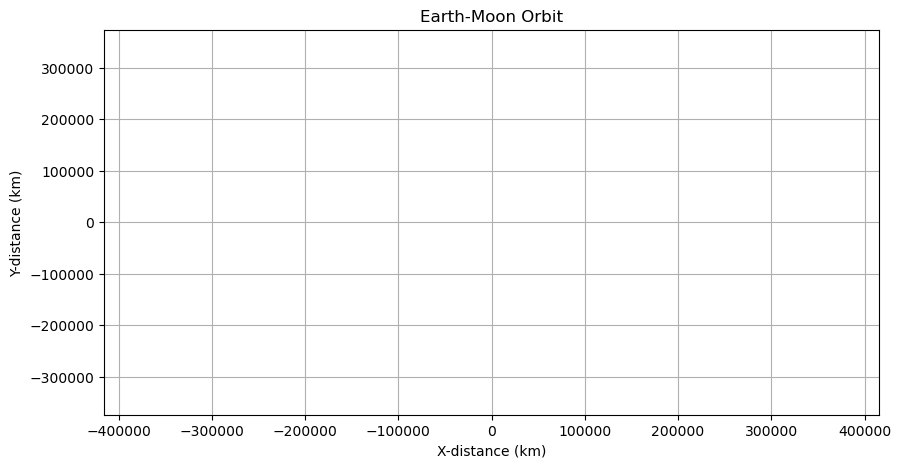

In [99]:
%matplotlib inline
from PIL import Image
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani


##Variables/functions
#Earth
big_g = 6.67428 * pow(10, -11) #Nm^2/kg^2
earth_mass = 5.972 * pow(10, 24) #kg
earth_rot_period = 23.9333 #in hours
earth_radius = 6378 #kilometers
earth_orb_period = 365.2422 #days
axial_tilt = (23.5 * np.pi) / 180
gem = 0.0098 #km/s^2

#Moon
moon_mass = 7.348 * pow(10, 22) #kg
moon_orb_period = 27.2917 #days
ecm_apogee = 405696 #km
ecm_perigee = 363300 #km
gcm = 0.001625 #km/s^2
#Sun
sun_mass = 1.989 * pow (10, 30) #kg
es_aphelion = 152097701 #km
es_perihelion = 147098074 #km

##Intermediate Vars
es_amp = (es_aphelion - es_perihelion)/2
em_amp = (ecm_apogee - ecm_perigee)/2

#Functions

def find_es_distance(time):
    return (es_amp)*np.cos((2*np.pi*time)/(earth_rot_period*earth_orb_period))+(es_aphelion-es_amp)

def find_em_majoraxes(time):
    return ecm_apogee*np.cos((2*np.pi*time)/(earth_rot_period*earth_orb_period))

def find_em_minoraxes(time):
    return ecm_perigee*np.sin((2*np.pi*time)/(earth_rot_period*earth_orb_period))

def find_tidal_force():
    return ((-2)*big_g*earth_mass*earth_radius)/(pow(ecm_distance, 3))

def find_waveheight(ecm_distance):
    return (3/2)*(big_g*earth_mass*(earth_radius**2))/(gem*(ecm_distance**2))

#Intermediates
t = np.arange(0,8750)     ##Approximate number of hours in orbit period                                                          
def ecm_disx(time):
    return find_em_majoraxes(time)

def ecm_disy(time):
    return find_em_minoraxes(time)
    

# ecm_dis = math.sqrt(ecm_disx**2 + ecm_disy**2)

fig, earth_moon = plt.subplots(figsize = (10,5))
x = []
y = []
line, = earth_moon.plot([], [], 'ro')

def init():
    earth_moon.set_xlim(-(ecm_apogee + 10000), ecm_apogee + 10000)
    earth_moon.set_ylim(-(ecm_perigee + 10000), ecm_perigee + 10000)
    return line,

def update(frame):
    x.append(ecm_disx(frame))
    y.append(ecm_disy(frame))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, update, frames = np.linspace(0, len(t), 128), init_func = init, blit = True)
earth_moon.grid()
earth_moon.set_title("Earth-Moon Orbit")
earth_moon.set_xlabel("X-distance (km)")
earth_moon.set_ylabel("Y-distance (km)")
plt.show()

anim.save("em-orb3.gif", writer = "pillow", fps = 20)

# earth_moon.plot(x, y)
# earth_moon.set_title("Earth-Moon Orbital Period")
# earth_moon.set_xlabel("X-distance (km)")
# earth_moon.set_ylabel("Y-distance (km)")
# plt.grid()
# plt.show()

# anim.save("orb.gif", writer = "pillow", fps = 20)

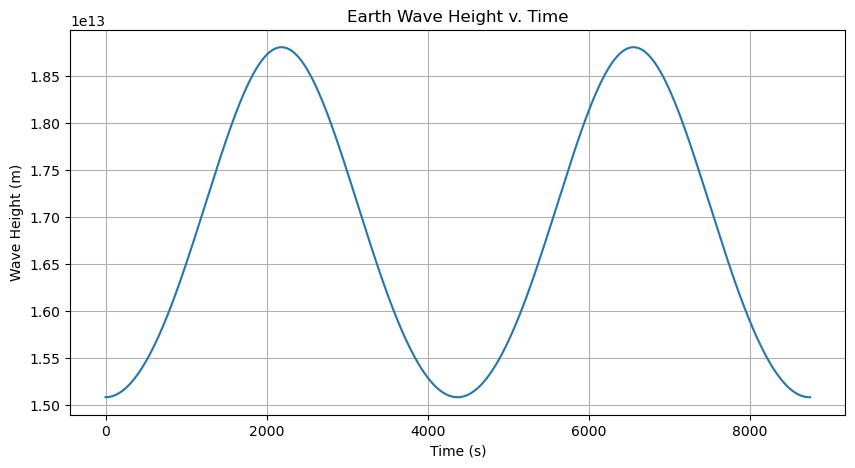

In [52]:
ecm_distance = np.sqrt(x**2 + y**2)
wave_heights = find_waveheight(ecm_distance)
fig0, ax0 = plt.subplots(1, figsize = (10,5))
ax0.plot(t, wave_heights)
ax0.set_title("Earth Wave Height v. Time")
ax0.set_xlabel("Time (s)")
ax0.set_ylabel("Wave Height (m)")
ax0.grid()

anim = ani.FuncAnimation(fig, update, frames = 100, interval = 50, blit = True)
plt.show()


In [84]:
# #Animation Settings

# line, = earth_moon.plot(ecm_disx, ecm_disy)
# def update(frame):
#     line.set_ydata(find_em_majoraxes(t + frame/10.0), find_em_minoraxes(t + frame/10.0))
#     return line,

# anim = ani.FuncAnimation(fig, update, frames = 100, interval=50, blit = True)
# anim.save("Orbitanim.gif", writer = "pillow", fps = 20)
# plt.show()

# #at every time step t, plot a point on the ellipse
# #update function: figure objects --> canvas/graph, axis objects --> grid on top of figure
# #start drawing line objecs on the grid, points drawn on the figure
# #update function replaces line object with data points
# #tracing an ellipse --> only want one point plotted at a time
# #add images to matplotlib, directionality -->
# #stretch factor --> decompose vectors, abs(cos(wt))?
#     #

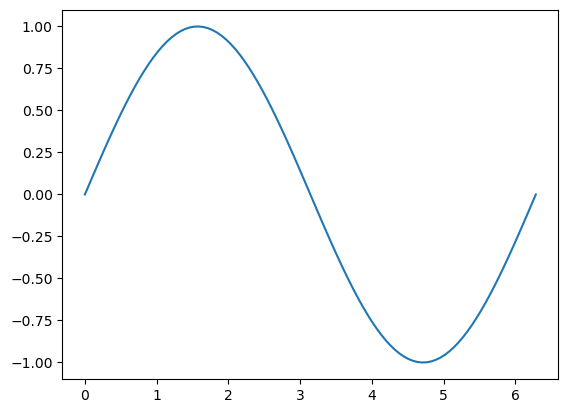

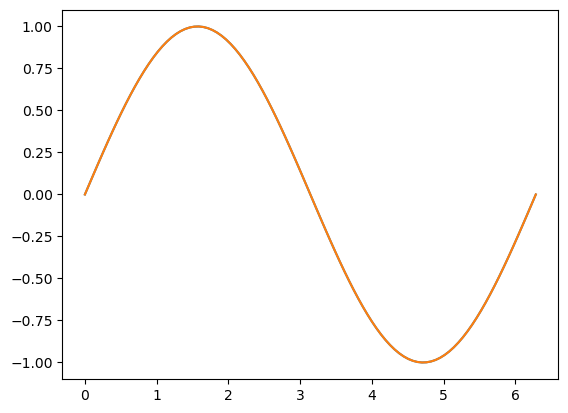

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
plt.plot(x,y)
plt.show()


fig, ax = plt.subplots()
ax.plot(x, y)

line, = ax.plot(x, y)

def update(frame):
    line.set_ydata(np.sin(x + frame/10.0))
    return line,

anim = ani.FuncAnimation(fig, update, frames = 100, interval = 50, blit = True)
plt.show()

anim.save("sine.gif", writer = "pillow", fps = 20)
# plt.show()

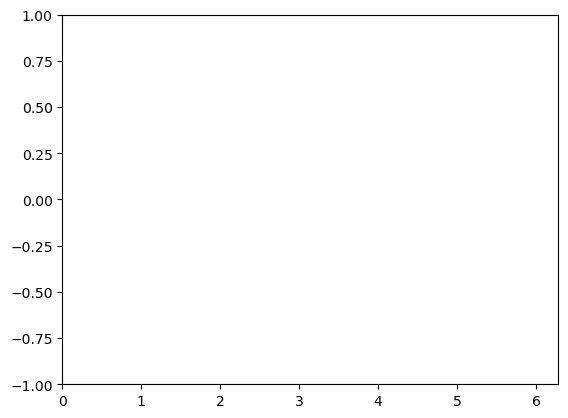

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()
ani.save("rand.gif", writer = "pillow", fps = 20)